In [1]:
%load_ext autoreload
%autoreload 2

Then, we run some setup code for this notebook: Import some useful packages and increase the default figure size.

In [2]:
# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# set figure size
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['font.size'] = 10
%config InlineBackend.figure_format = 'retina'

In [3]:
from IPython.display import display_html, HTML

display_html(HTML('''
<style type="text/css">
  .instruction { background-color: yellow; font-weight:bold; padding: 3px; }
</style>
'''));

In [4]:
import pca
pca.hello_world()   # should print "Hello world from EECS 545 PCA!"

Hello world from EECS 545 PCA!


In [5]:
images = np.load("data/face.npy")
images.shape

(2414, 48, 42)

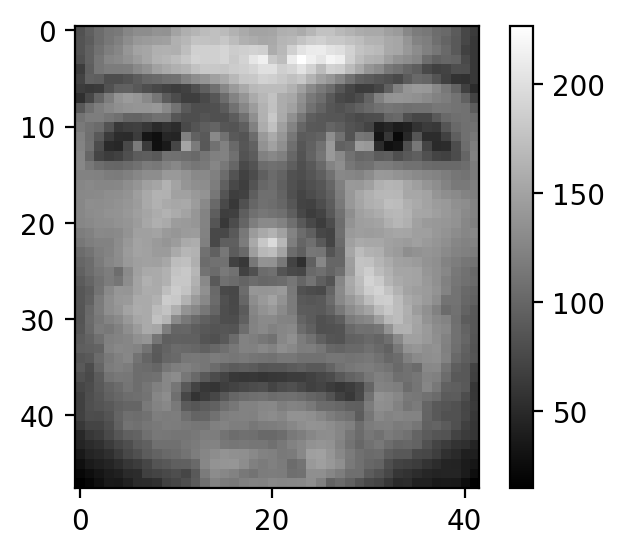

In [6]:
fig, ax = plt.subplots(figsize=(4, 3))
im = ax.imshow(images[0], cmap='gray');
fig.colorbar(im);

In [7]:
# Convert images to a 2D matrix
X = images.reshape([images.shape[0], -1])

In [8]:
%%time
U, eigenvalues = pca.train_PCA(X)

CPU times: user 12.8 s, sys: 943 ms, total: 13.7 s
Wall time: 1.59 s


In [9]:
print(eigenvalues[:10])

[2718207.40988722 2610783.99363043  365363.88318788  211062.3677067
  110557.40979615  104672.41713697   78480.41139035   67004.29456699
   52571.01809635   49176.70124035]


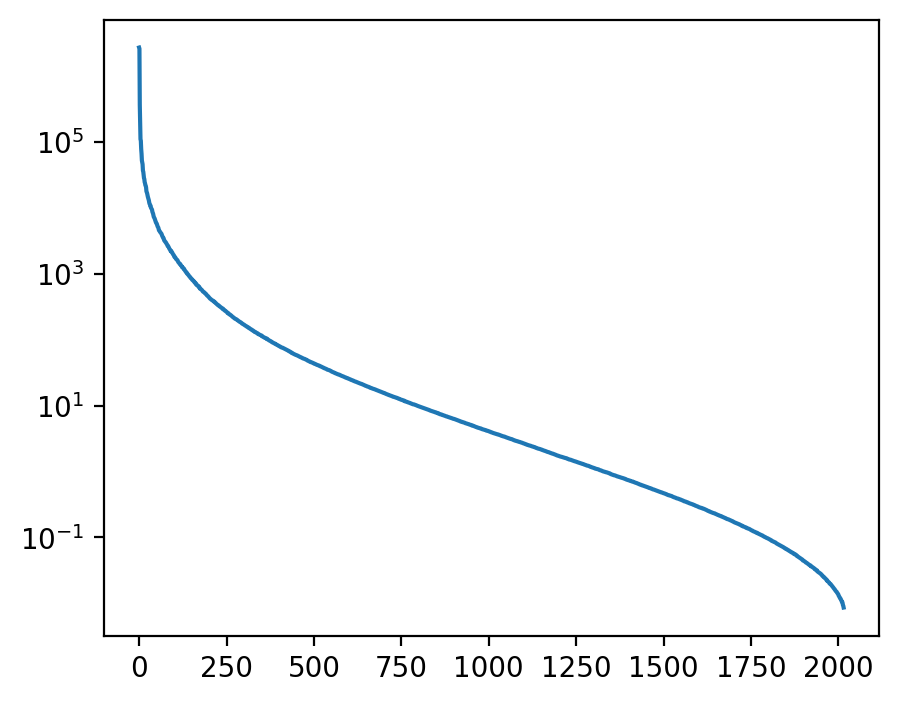

In [10]:
fig, ax = plt.subplots()


ax.plot(eigenvalues)
ax.set_yscale('log')

Now work on 3(d): You will need to <span class="instruction">make a 2x5 array of plots</span> showing the first 9 eigenvalues as well as the mean of images as the first principal component. Please use `"jet"` color map (see [matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) documentation) to visualize the difference more clearly. Also note that each eigenface may have different colormap scale; optionally, you may also want to add colorbars to visualize the scale of colormaps.

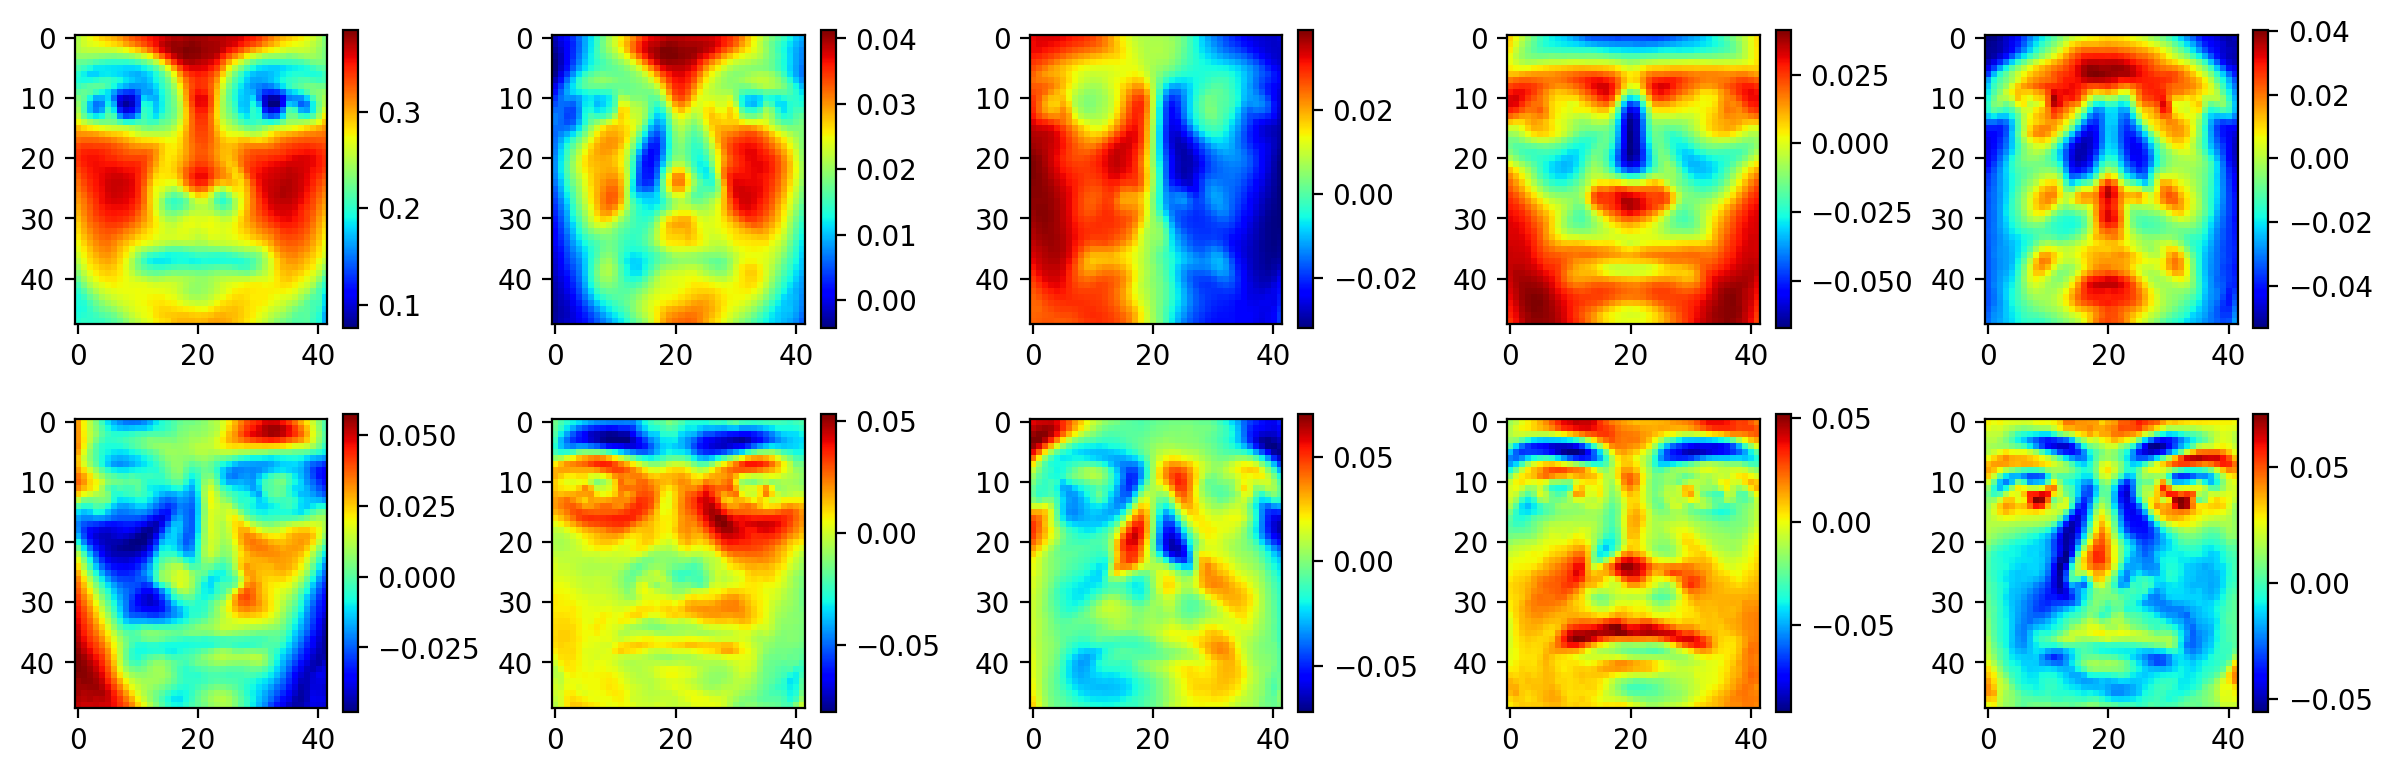

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(12, 4))


# ~~START DELETE~~
eigenfaces = np.zeros([10, 48, 42])
eigenfaces[0, ...] = np.mean(images, axis=0) / 255.0

for i in range(9):
    eigenfaces[i + 1, ...] = U[:, i].reshape(48, 42)
    
for i in range(10):
    im = axes.flat[i].imshow(eigenfaces[i], cmap='jet')
    fig.colorbar(im)

fig.tight_layout()

## 3(e) Total Variance

<span class="instruction">Now work on answering 3(e)</span>: feel free to create more cells to do necessary computation.

In [13]:

cumul_ev = np.cumsum(eigenvalues)
variance_por = cumul_ev / cumul_ev[-1]

index_1 = (variance_por >= 0.95).nonzero()[0][0] + 1
index_2 = (variance_por >= 0.99).nonzero()[0][0] + 1
print(index_1, 1 - index_1 / 48/42)
print(index_2, 1 - index_2 / 48/42)


43 0.9786706349206349
167 0.9171626984126984
